In [14]:
import sys
sys.path.append("C:\\Users\\olgat\\Desktop\\Stage Amiens\\1 - FONCTIONS") 
import functions
import numpy as np
import pandas as pd
import os
import IPython
import matplotlib.pyplot as plt
import IPython.display

In [25]:
path = "C:/Users/olgat/Desktop/Stage Amiens/4 - ML_MoCap/Mvt_clean/5MhrdP0_cup_M5"
dP0_csv = functions.list_of_files(path)

#### Preprosessing

In [27]:
def list_to_array(input_list):
    np_list=[]
    for elem in input_list:
        df = pd.read_csv(elem, header=None).fillna(0)

        df = df.iloc[:,[ 38, 40, 41, 42, 88, 89, 90, 91, 92, 83, 84, 85, 86, 87, 74, 75, 76, 77, 78, 79, 80, 81, 82, 72, 73, 67,# LEFT
                        98, 45, 44, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 69, 65]]
        np_array = df.to_numpy()
        np_list.append(np.nan_to_num(np_array))
    return np_list

In [28]:
dP0_list = list_to_array(dP0_csv)

In [29]:
inter_list = functions.list_to_interpolate(dP0_list)
# inter_list[0].shape, len(inter_list)
scaled_list, max_value_list, min_value_list = functions.scaled_data2(inter_list)

#### Baseline

In [30]:
data_np = np.array(scaled_list[:25]) # train set 

In [31]:
baseline = np.mean( (np.array(data_np)), axis=0 )

In [32]:
def create_time_steps(length):
    return list(range(-length, 0))
def multi_step_plot(true_future, prediction, num_marker, num_marker_2 = None):
    plt.figure(figsize=(15, 10))
    num_out = len(true_future)
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(num_out), np.array(true_future[:, num_marker:num_marker+1]), color='royalblue', lw=2, #royalblue
           label='real movement')
    if prediction.any():
        plt.plot(np.arange(num_out), np.array(prediction[:, num_marker:num_marker+1]), 'brown',lw=2,
                 label='baseline movement')
    plt.fill_between(np.arange(num_out), np.array(true_future[:, num_marker:num_marker+1]).reshape(num_out), np.array(prediction[:, num_marker:num_marker+1]).reshape(num_out), 
                     color='mistyrose', label='erreur')
    #plt.ylim(0, 25)
    plt.ylim(0,1.1)
    plt.title(f'Left side', fontname="Times New Roman",fontsize=15)
    plt.ylabel('Displacement', fontname="Times New Roman",fontsize=15)
    plt.xlabel('Time [sec]', fontname="Times New Roman",fontsize=15)        
    plt.legend(loc='upper right')
    if num_marker_2 is not None:
        plt.subplot(2, 2, 2)
        plt.plot(np.arange(num_out), np.array(true_future[:, num_marker_2:num_marker_2+1]), color='royalblue', lw=2,
               label='real movement')
        if prediction.any():
            plt.plot(np.arange(num_out), np.array(prediction[:, num_marker_2:num_marker_2+1]), 'brown',lw=2,
                     label='baseline movement')
    plt.fill_between(np.arange(num_out), np.array(true_future[:, num_marker_2:num_marker_2+1]).reshape(num_out), 
                     np.array(prediction[:, num_marker_2:num_marker_2+1]).reshape(num_out), color='mistyrose', label='erreur')
    plt.ylim(0, 1.1)
    #plt.ylim(0, 25)
    plt.title(f'Right side', fontname="Times New Roman",fontsize=15)
    plt.ylabel('Displacement', fontname="Times New Roman",fontsize=15)
    plt.xlabel('Time [sec]', fontname="Times New Roman",fontsize=15)    
    plt.legend(loc='upper right')
    plt.show()

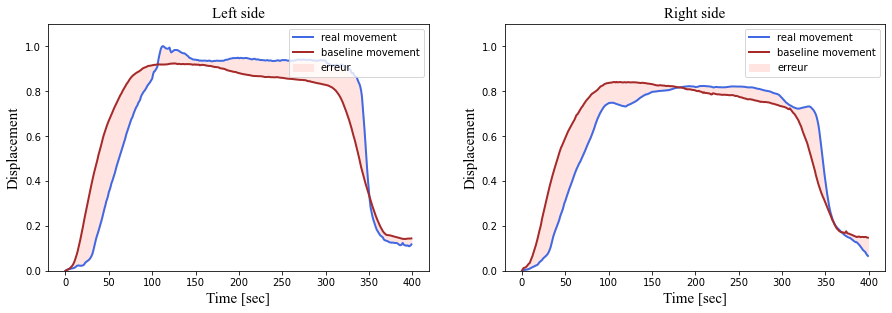

In [33]:
 multi_step_plot(scaled_list[-6], baseline, 1,27)

#### RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_total =list()
r2_total = list()
mms_list_test = scaled_list[int(len(scaled_list)*0.9):]
for elem in mms_list_test:
    rmse = mean_squared_error(elem, baseline, squared=False)
    r2 = r2_score(elem, baseline)
    r2_total.append(r2)
    rmse_total.append(rmse)

In [ ]:
len(rmse_total)

In [ ]:
rmse_mean = np.mean(rmse_total)
r2_mean = np.mean(r2_total)
rmse_mean, r2_mean